In [ ]:
!pip install scikit-multiflow

In [15]:
from skmultiflow.data import WaveformGenerator
from skmultiflow.data import SEAGenerator
from skmultiflow.trees import HoeffdingTreeClassifier
import matplotlib.pyplot as plt
import numpy as np


#dataStream = WaveformGenerator(random_state = 1)
dataStream = SEAGenerator(random_state = 1)

In [16]:
def frequentItem(List):
    cntr = 0
    item = List[0]
    for i in List:
        currFrequency = List.count(i)
        if(currFrequency> cntr):
            cntr = currFrequency
            item = i
    return item

In [17]:
baseAcc = [0]
for ii in range(15):
  ii +=1
  nBaseModel = ii
  hoeffTree = []

  for i in range(nBaseModel):
    hoeffTree = hoeffTree + [HoeffdingTreeClassifier()]
  print(f'Total Model: Bagging of {nBaseModel} Hoeffding Tree.')

  maxSample = 20000
  nSample = 0
  corrSample = 0
  accList = []

  while nSample < maxSample and dataStream.has_more_samples():
    X, Y = dataStream.next_sample()

    yList = []
    for ht in hoeffTree:
      yList += [ht.predict(X)]

    votedItem = frequentItem(yList)
    if votedItem == Y:
      corrSample += 1
  
    for i in range(nBaseModel):
      pssnRand = np.random.poisson(1, 1)[0]
      if pssnRand > 10:
        pssnRand = 10
      for j in range(pssnRand):
        hoeffTree[i] = hoeffTree[i].partial_fit(X, Y)
    nSample += 1
  print(f'{nBaseModel} Ensemble Hoeffding Tree: {nSample} Instance analyzed.')
  print(f'Accuracy: {corrSample/nSample}')
  baseAcc.append(corrSample/nSample)

Total Model: Bagging of 1 Hoeffding Tree.
1 Ensemble Hoeffding Tree: 20000 Instance analyzed.
Accuracy: 0.97105
Total Model: Bagging of 2 Hoeffding Tree.
2 Ensemble Hoeffding Tree: 20000 Instance analyzed.
Accuracy: 0.9698
Total Model: Bagging of 3 Hoeffding Tree.
3 Ensemble Hoeffding Tree: 20000 Instance analyzed.
Accuracy: 0.9725
Total Model: Bagging of 4 Hoeffding Tree.
4 Ensemble Hoeffding Tree: 20000 Instance analyzed.
Accuracy: 0.9739
Total Model: Bagging of 5 Hoeffding Tree.
5 Ensemble Hoeffding Tree: 20000 Instance analyzed.
Accuracy: 0.9762
Total Model: Bagging of 6 Hoeffding Tree.
6 Ensemble Hoeffding Tree: 20000 Instance analyzed.
Accuracy: 0.97825
Total Model: Bagging of 7 Hoeffding Tree.
7 Ensemble Hoeffding Tree: 20000 Instance analyzed.
Accuracy: 0.9725
Total Model: Bagging of 8 Hoeffding Tree.
8 Ensemble Hoeffding Tree: 20000 Instance analyzed.
Accuracy: 0.97225
Total Model: Bagging of 9 Hoeffding Tree.
9 Ensemble Hoeffding Tree: 20000 Instance analyzed.
Accuracy: 0.974

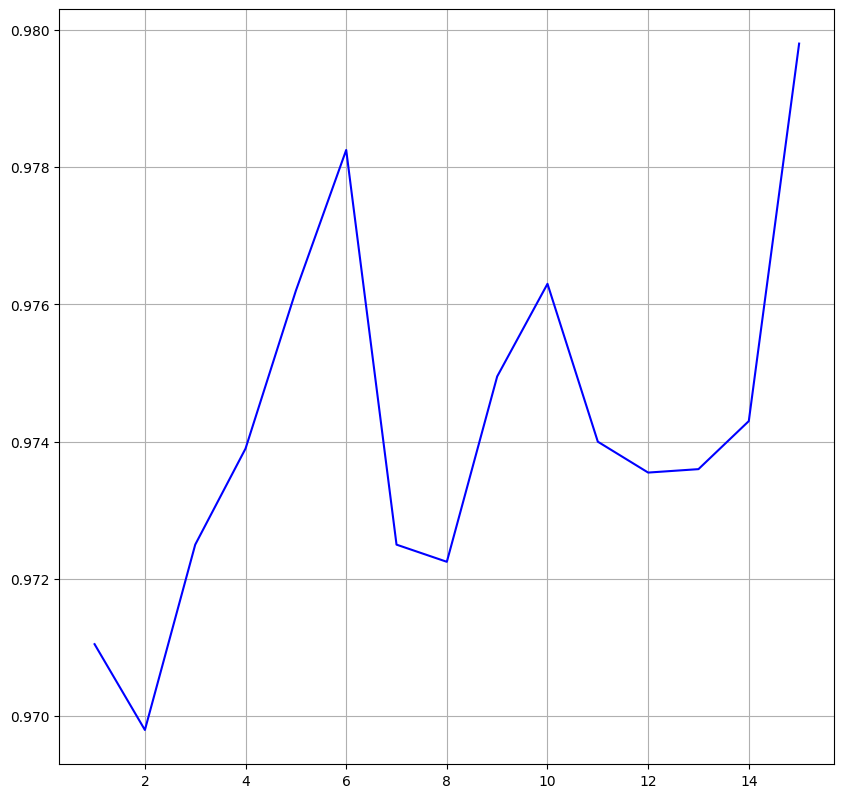

In [18]:
plt.figure(figsize=(10, 10), dpi=100)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], baseAcc[1:],'b')
plt.grid(True)
plt.show()